# OpenStreetMap & Shapefile example 

#### Author : Gwanjun Shin

Using matplotlib and numpy, we gonna address how to handle map file with python

How to get OSM file   
you can use Korea GIS system and https://www.openstreetmap.org/#map=17/35.70463/128.45739


## Prerequisite

In [6]:
!pip3 install matplotlib
!pip3 install pyshp
!pip3 install numpy
!pip3 install osmnx #if rtree has occured "sudo apt install libspatialindex-dev python-rtree"


  Using cached https://files.pythonhosted.org/packages/e6/fc/5889757c4c70c552f56fddc8fbdcab565475686cdebdfa1806a9d54cd53b/matplotlib-3.2.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/62/20/4d43e141b5bc426ba38274933ef8e76e85c7adea2c321ecf9ebf7421cedf/numpy-1.18.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5d/bc/1e58593167fade7b544bfe9502a26dc860940a79ab306e651e7f13be68c2/pyparsing-2.4.6-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f8/a1/5742b56282449b1c0968197f63eae486eca2c35dcd334bab75ad524e0de1/kiwisolver-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using

  Using cached https://files.pythonhosted.org/packages/a2/db/4313ab3be961f7a763066401fb77f7748373b6094076ae2bda2806988af6/attrs-19.3.0-py2.py3-none-any.whl


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import osmnx
import osmnx as ox, networkx as nx, geopandas as gpd
import shapely
import geopandas as gpd

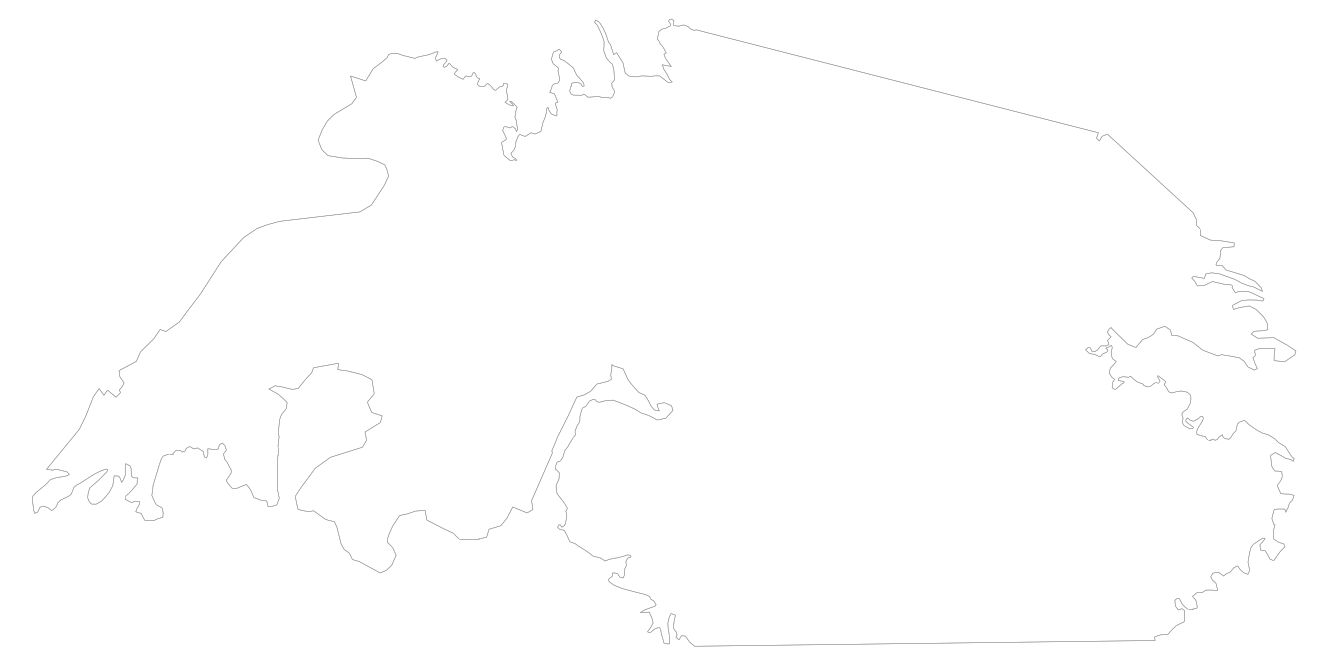

In [10]:
G = ox.graph_from_file("map-osmorg.osm", simplify=False)
# https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.core.graph_from_file

fig, ax = ox.plot_graph(G, fig_height=12, node_size=0, edge_linewidth=0.5)

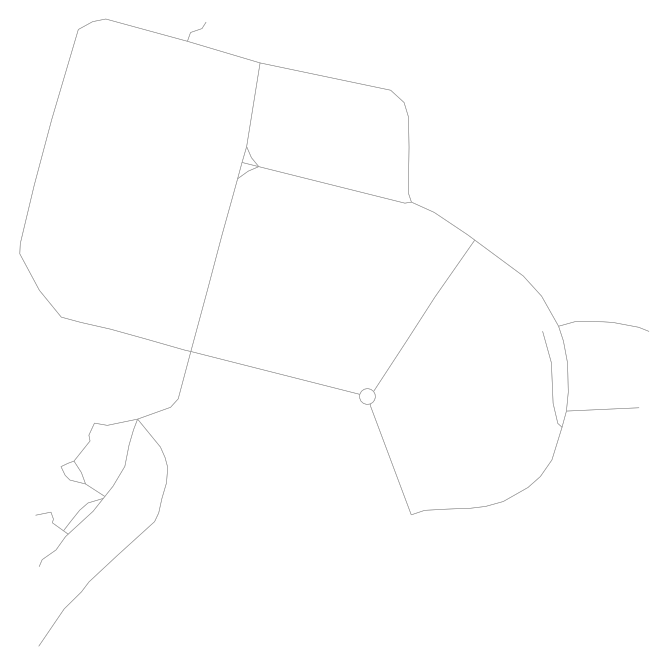

{'n': 30, 'm': 78, 'k_avg': 5.2, 'intersection_count': 25, 'streets_per_node_avg': 2.7666666666666666, 'streets_per_node_counts': {0: 0, 1: 5, 2: 0, 3: 22, 4: 3}, 'streets_per_node_proportion': {0: 0.0, 1: 0.16666666666666666, 2: 0.0, 3: 0.7333333333333333, 4: 0.1}, 'edge_length_total': 10762.456000000002, 'edge_length_avg': 137.98020512820514, 'street_length_total': 5381.227999999999, 'street_length_avg': 137.9802051282051, 'street_segments_count': 39, 'node_density_km': None, 'intersection_density_km': None, 'edge_density_km': None, 'street_density_km': None, 'circuity_avg': 1.134870188403036, 'self_loop_proportion': 0.0, 'clean_intersection_count': None, 'clean_intersection_density_km': None}


In [18]:
G = ox.graph_from_bbox(35.7089, 35.6996, 128.4639, 128.4513, network_type='drive')
fig, ax = ox.plot_graph(G, fig_height=12, node_size=0, edge_linewidth=0.5)
print(ox.basic_stats(G))

In [24]:
import os
dgist_shp = []
dgist = {}
for root, dirs, files in os.walk("SEC02_dgist"):
    for file in files:
        if file.endswith(".shp"):
            dgist_shp.append(os.path.join(root, file))
            dgist.update({file.split('.')[0] : gpd.read_file(os.path.join(root, file))})

In [25]:
dgist.keys()

dict_keys(['A1_LANE', 'B3_POST_POINT', 'B2_SURFSIGN_LINE', 'OJ_HIST', 'A2_STOP', 'B1_SIGNAL_POINT', 'B2_SURFSIGN_POINT', 'B2_SURFSIGN_PLANE', 'B1_SIGN_POINT', 'B2_NOAUTONOMOUS_PLANE', 'A3_LINK', 'C1_NODE'])

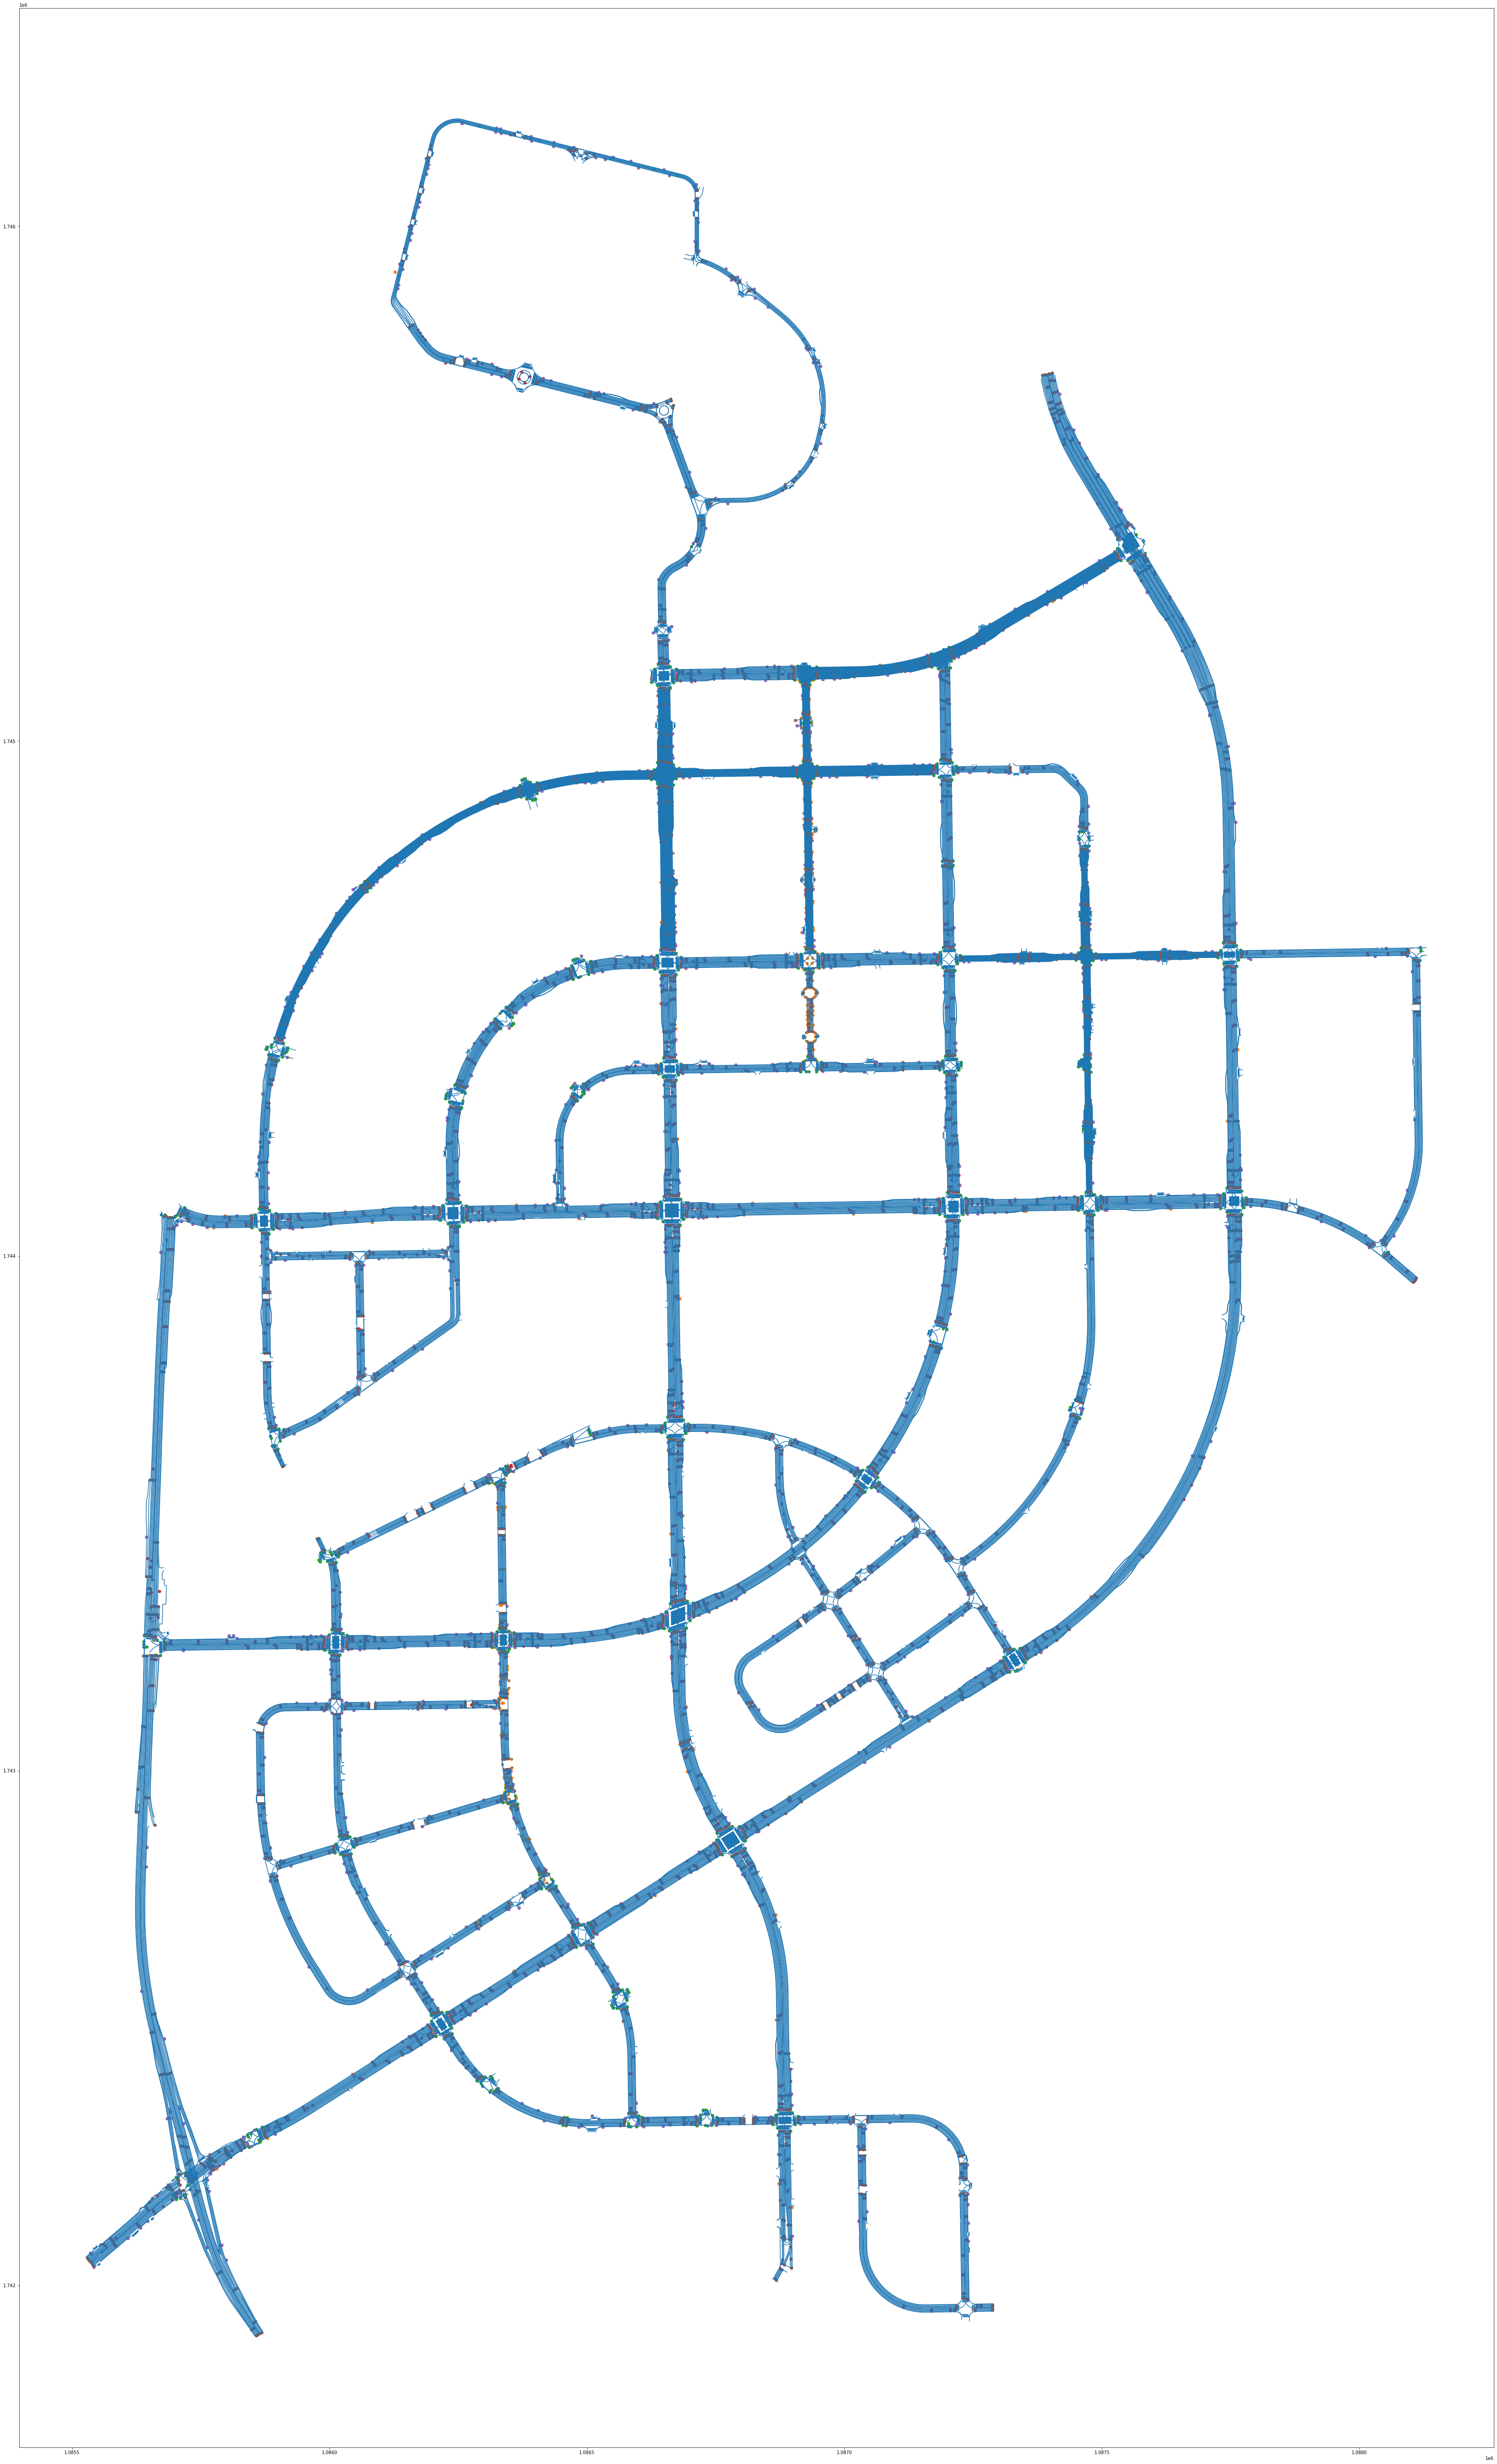

In [26]:
fig = plt.figure(figsize=(100,100))
ax = fig.add_subplot(1,1,1)

for convex in dgist.values():
    convex.plot(ax=ax)

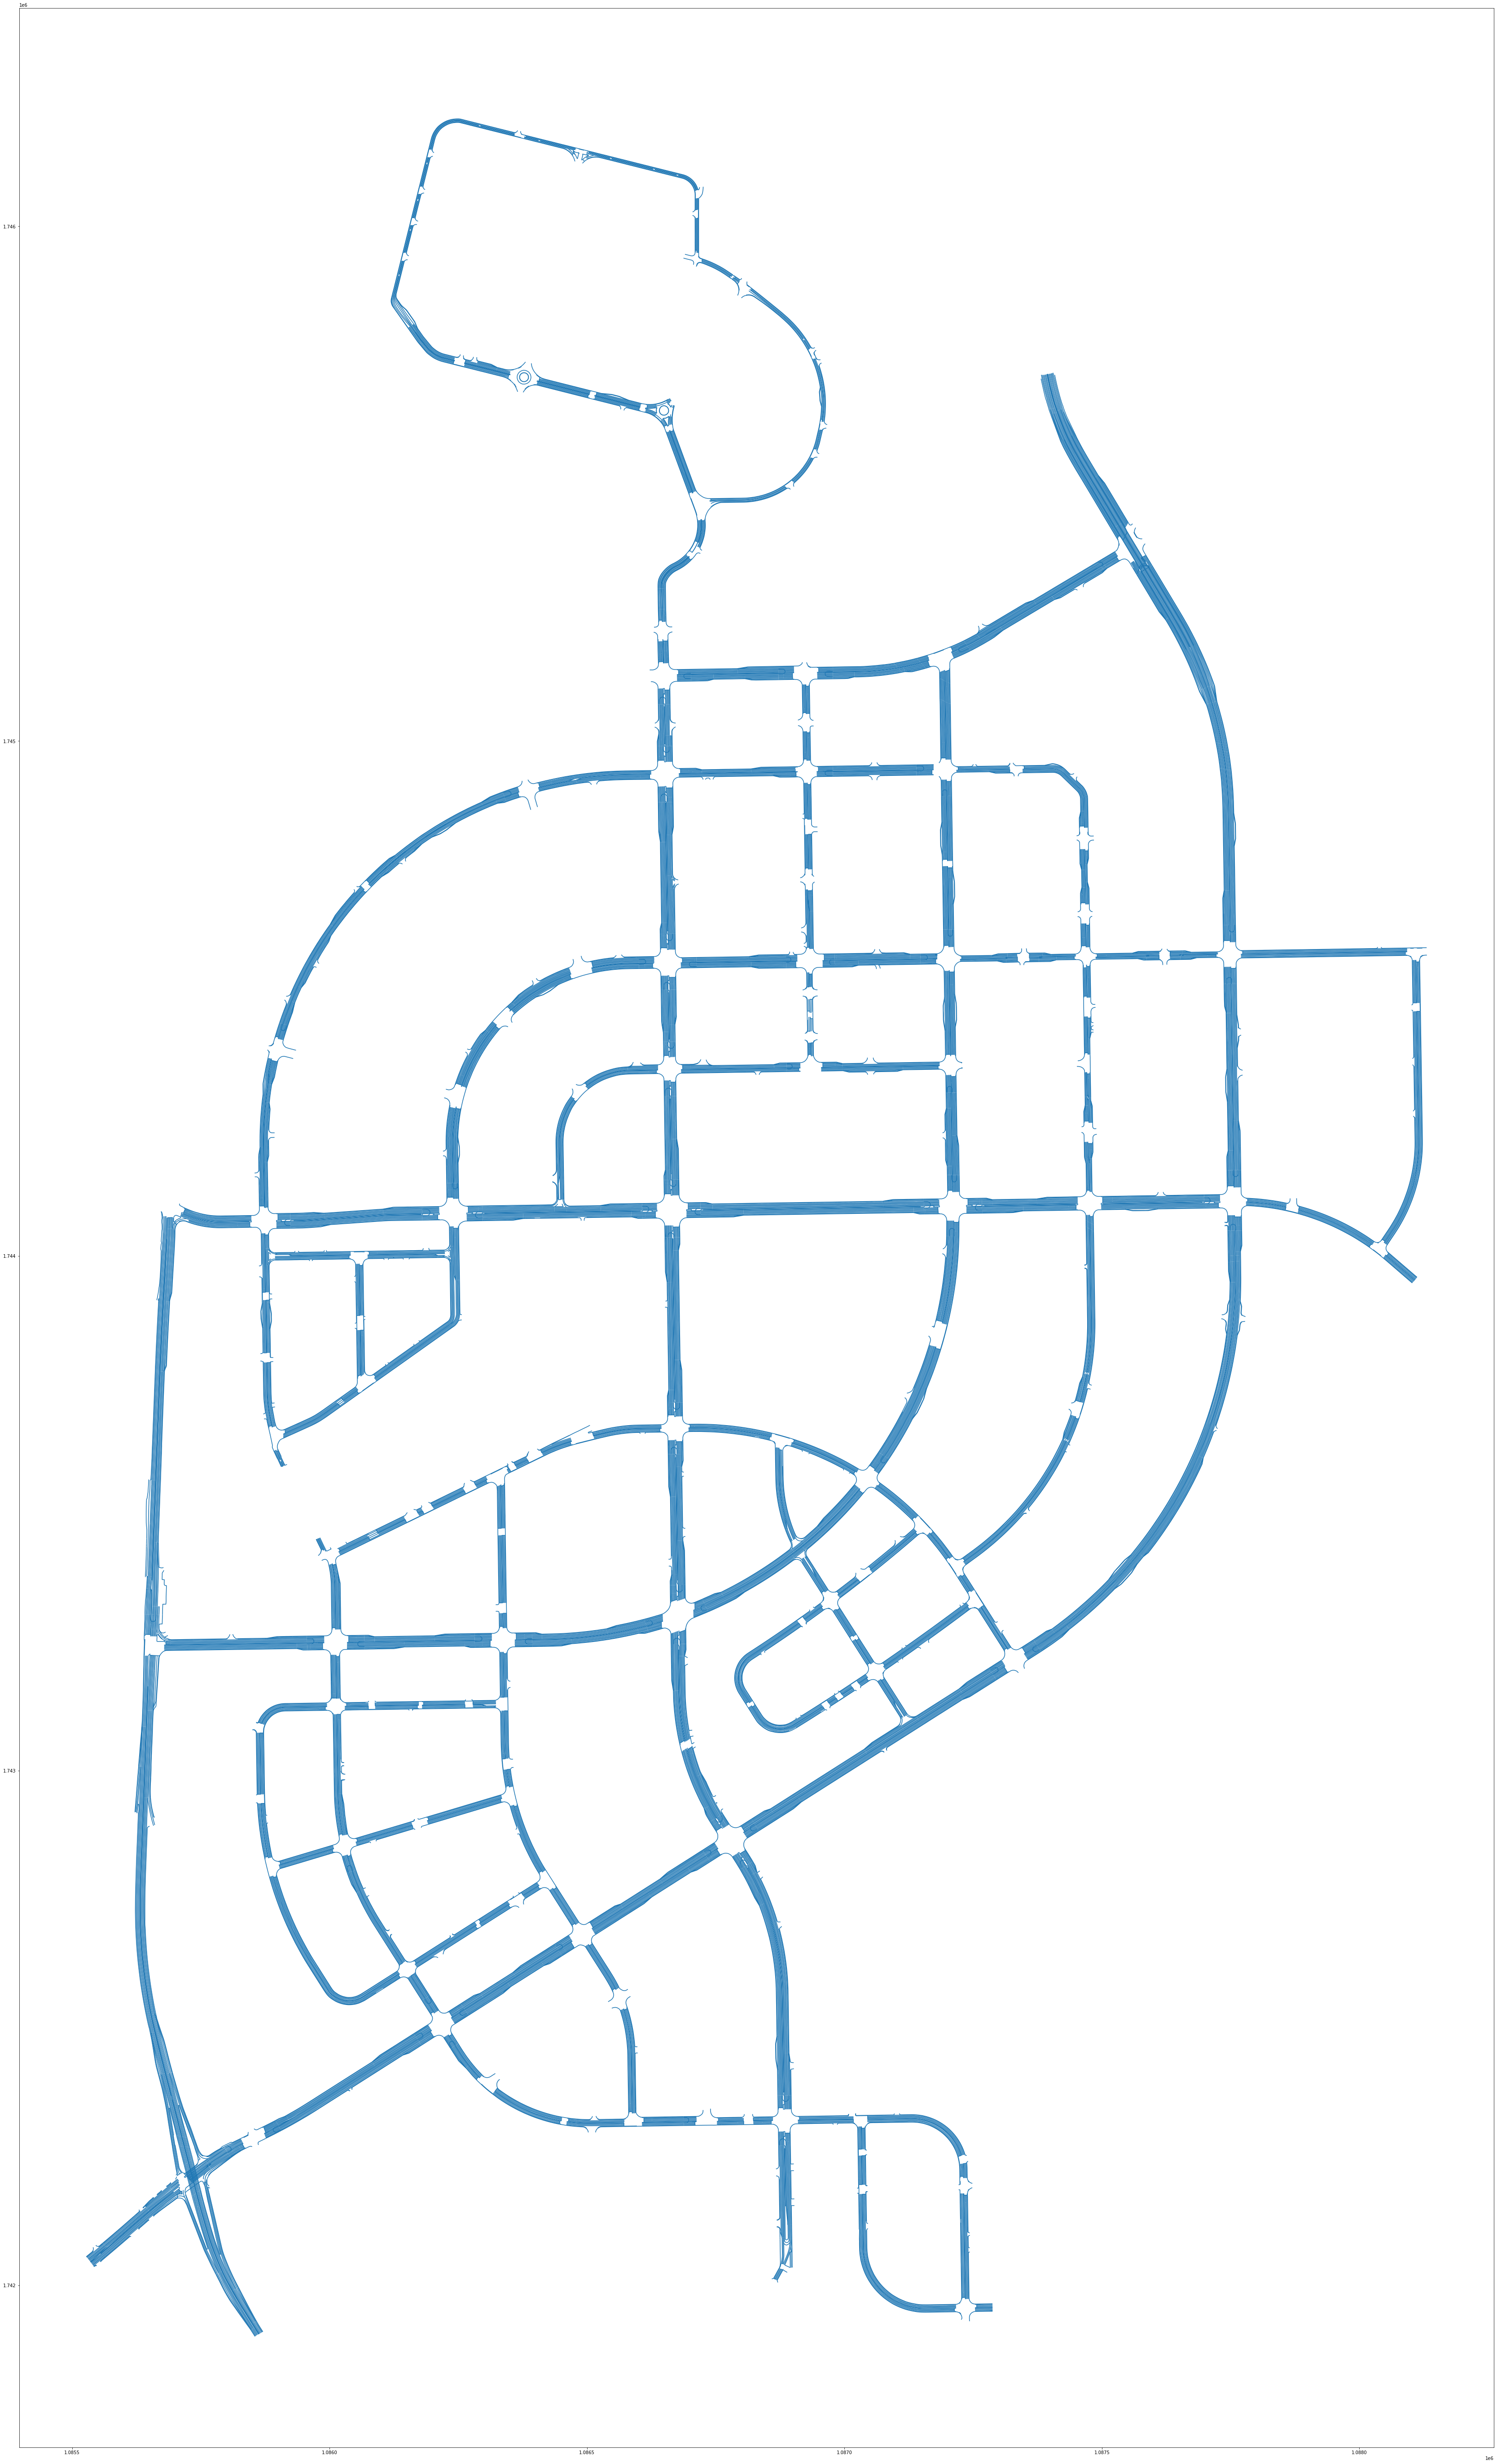

In [34]:
fig = plt.figure(figsize=(100,100))
ax = fig.add_subplot(1,1,1)

dgist['A2_STOP'].plot(ax = ax)
dgist['A1_LANE'].plot(ax = ax)
dgist['A3_LINK'].plot(ax = ax)

0       LINESTRING Z (1086473.169 1746145.465 87.335, ...
1       LINESTRING Z (1086494.163 1746147.598 87.466, ...
2       LINESTRING Z (1086497.733 1746133.765 87.418, ...
3       LINESTRING Z (1086651.678 1745010.917 42.870, ...
4       LINESTRING Z (1086653.182 1744803.940 44.601, ...
                              ...                        
7289    LINESTRING Z (1086922.483 1744722.651 49.871, ...
7290    LINESTRING Z (1086924.937 1744699.283 50.261, ...
7291    LINESTRING Z (1086933.370 1745016.240 47.645, ...
7292    LINESTRING Z (1086937.568 1744699.994 50.222, ...
7293    LINESTRING Z (1086935.658 1744391.025 53.690, ...
Name: geometry, Length: 7294, dtype: geometry

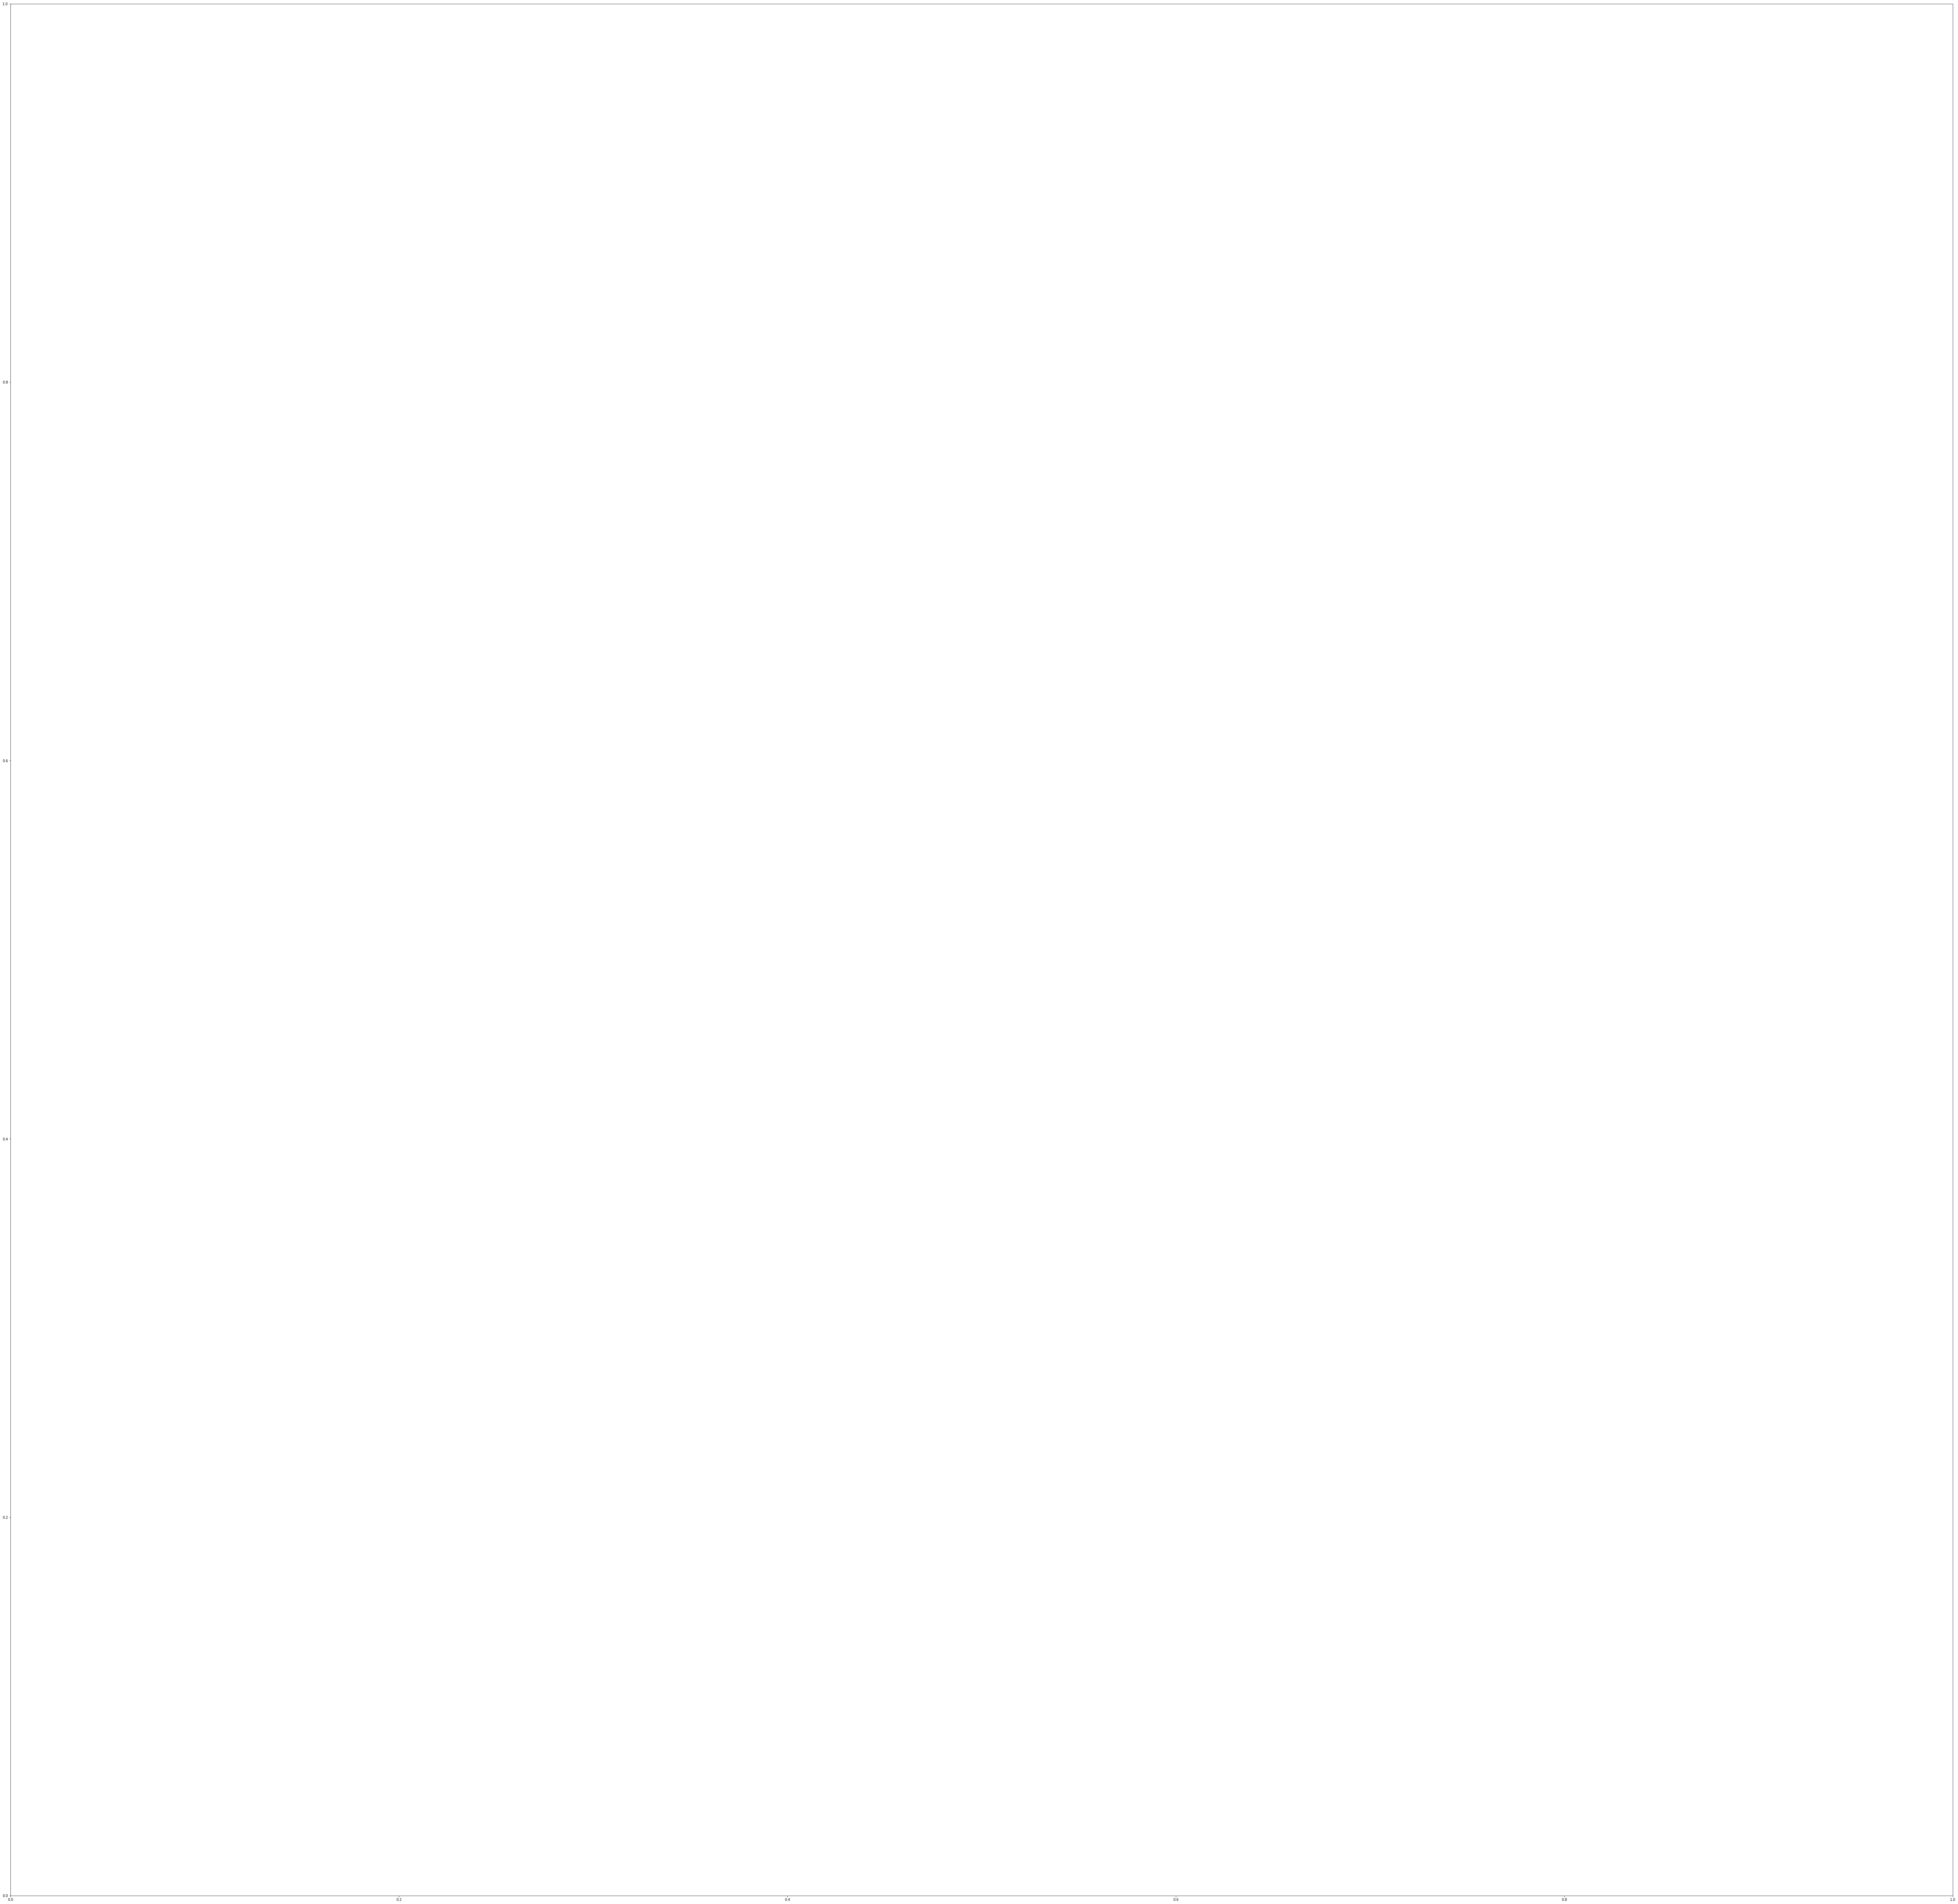

In [42]:
fig = plt.figure(figsize=(100,100))
ax = fig.add_subplot(1,1,1)

dgist['A1_LANE'].geometry
